# Amazon Exploratory Sales Data Analysis: Which Category of Products Has the Highest Revenue, Most Discounts, and Most Customer Engagement?

### Project Conducted by: James Weber

### Date: February 25 2024

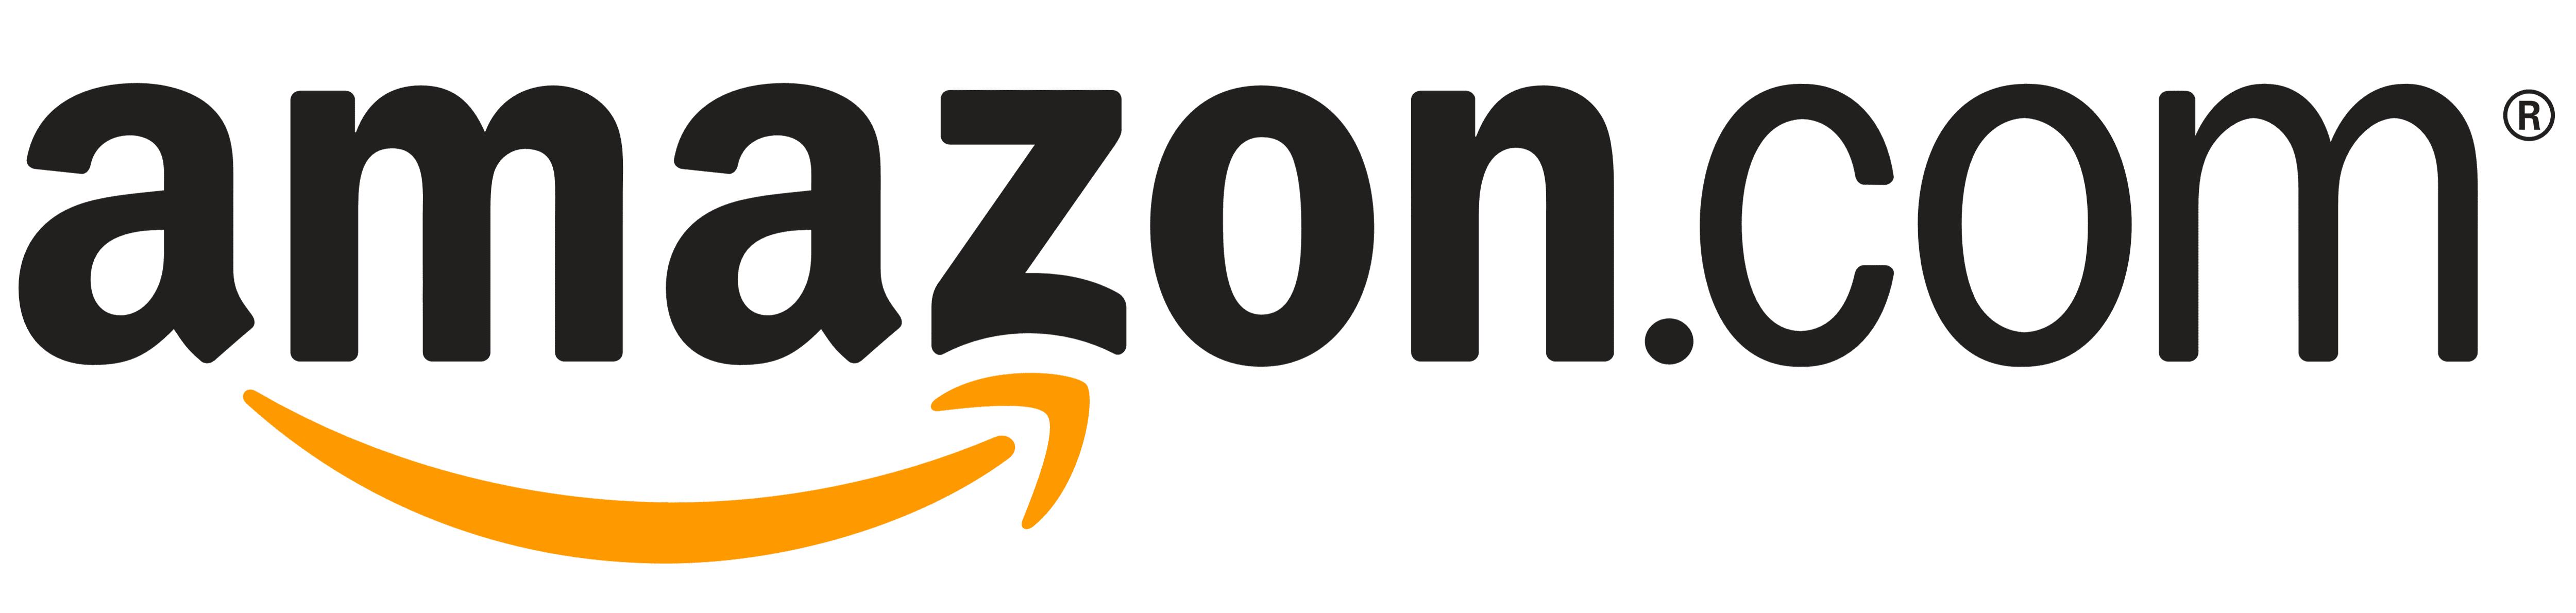

# Introduction

My name is James Weber. I am an aspiring data analyst, attending Cetral Washington University, majoring in ITAM and specializing in data driven innovation. This project is conducted to analyze the sales data of over 1000 products sold in Amazon. **The purpose of this project is to conduct exploratory data analysis and determine which category of products has the highest revenue, which category offers the most discounts, which category has the highest customer engagement, and other insights.**

# Deliverables
1. A description of all data sources used. (About the Data)
2. Documentation of any cleaning or manipulation of data. (Importing and Cleaning the Data)
3. Supporting visualizations and key findings. (Analyzing the Data)
4. A summary of the analysis. (Conclusions)
5. A dashboard that summarizes key insights.

# About the Data
The data for this analysis is provided by Karkavelraja, J. The dataset includes the sales data for over 1000 products found on Amazon, including the price of the product, average rating, reviewer information, product description, and product link.

[The data can be found in this website.](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset)

The data file that will be used in this project is amazon.csv. The dataset consists of 16 columns.

1. product_id - The ID number for the product.
2. product_name - The name of the product.
3. category - The category of the product.
4. discounted_price - The price of the product after the discount.
5. actual_price - The original price of the product.
6. discount_percent - A percentage of the actual price that's been discounted.
7. rating - The average rating of the product (0-5 stars).
8. rating_count - The number of customers who rated the product.
9. about_product - A description of the product.
10. user_id - The user ID of the a reviewer.
11. user_name - The user name of the reviewer.
12. review_id - The ID number for a review.
13. review_title - The title of a review.
14. review_content - The content of a review.
15. img_link - A link to the image of the product.
16. product_link - A link to the product page.

# Importing and Cleaning the Data

### 1. Importing libraries.
Many commands that are used in this analysis are not included in base Python and need to be imported from libraries.

In [ ]:
import numpy as np # For .unique()
                       # .reshape ()

import pandas as pd # For .read_csv()
                        # .describe()
                        # .astype()
                        # .apply()
                        # .round()
                        # .value_counts()
                        # .loc[]
                        # .isna()
                        # .sum()
                        # .index
                        # .drop_duplicates
                        # .rename()
                        # .drop()
                        # .reset_index()
                        # .merge()
                        # .groupby()
                        # .pivot_table()
                        # .sort_values()
                        # .head()
                        # .iloc[]
                        
import matplotlib.pyplot as plt # For .subplots()
                                    # .bar_label()
                                    # .show()
                                    # .scatter()
                                    # .plot()
                                    # .xlabel()
                                    # .ylabel()
                                    # .title()
                                    # .show()

import seaborn as sns # For .barplot()
                          # .set()
                          # .histplot()
                          # .boxplot()
                          # .heatman()
                          # .scatterplot()

### 2. Importing datasets.
The data file used in this project is amazon.csv. Each row contains data on 1 product.

In [ ]:
# Use the .read_csv command to import the .csv file.
# Name the dataframe "amazon".

amazon = pd.read_csv(r'/kaggle/input/amazon-sales-dataset/amazon.csv')
amazon

### 3. Retrieving descriptive statistics.
Descriptive statistics summarizes the characterisitcs of the dataset. Analyze the descriptive statistics to see if there are any odd values in the dataframe.

In [ ]:
# Use the .describe() command to get a high level overview of the amazon dataframe.

amazon.describe()

In [ ]:
# Use the .info() command to show what data types are in each column and how many values are non-null.

amazon.info()

Based on the information above, all columns have an object data type. **The object data type is not appropriate for the discounted_price, actual_price, discount_percentage, rating, and rating_count columns. These columns should have a float64 data type.**

However, attempts to change the data type from object to float64 will result in an error. All 5 columns have symbols that are not part of the float64 data type (commas, currency symbols, percent symbols, etc.). These symbols must be removed before the data type can be changed.

### 4. Removing symbols from columns and converting those columns into float64 data type.

#### 4a. Converting discounted_price and actual_price columns.

In [ ]:
# Use the .str.replace() command to remove commas and ₹ from the discounted_price and actual_price columns.
# Use the .astype() command to convert the data type in the discounted_price and actual_price columns to float64.

amazon['discounted_price'] = amazon['discounted_price'].str.replace("₹",'').str.replace(",",'').astype('float64')

amazon['actual_price'] = amazon['actual_price'].str.replace("₹",'').str.replace(",",'').astype('float64')

**Both discount and actual prices are in Rupees. Convert the Indian Rupees into the US dollars.** The exchange rate for Rupees to dollars is 0.012.

In [ ]:
# Use the .apply() command to apply a function to every row.
# Use lambda to create a function.

exchange_rate = 0.012
amazon['discounted_price'] = amazon['discounted_price'].apply(lambda x: x * exchange_rate)
amazon['actual_price'] = amazon['actual_price'].apply(lambda x: x * exchange_rate)

# Use the round() command to round the prices to 2 decimal places.

amazon['discounted_price'] = round(amazon['discounted_price'], 2)
amazon['actual_price'] = round(amazon['actual_price'], 2)

#### 4b. Creating a discount_amount column.
It may be useful to know the exact value of the discounts as well as the percentage.

In [ ]:
amazon['discount_amount'] = amazon['actual_price'] - amazon['discounted_price']

#### 4c. Converting the discount_percentage column.

In [ ]:
# Use the .str.replace() command to remove the % from the discount_percentage column.
# Use the .astype() command to convert the data type in the discount_percentage column to float64.

amazon['discount_percentage'] = amazon['discount_percentage'].str.replace('%','').astype('float64')

# Divide discount_percentage by 100 so that the values are in decimals.

amazon['discount_percentage'] = amazon['discount_percentage'] / 100

#### 4d. Converting the rating column.
The rating column looks fine, but trying to convert the data type to float64 results in an error. There may be a value that does not match the float64 data type.

In [ ]:
# Use the .value_counts() command to look at unique values in a column and how many of each values are there.

amazon['rating'].value_counts()

Near the bottom of the list, there is a | value. The | value is preventing the data from being converted into float64 data type. Locate the row with | in the rating column, go to the product webpage, and replace the | value with the actual rating.

In [ ]:
# Use the .loc[] command to select the row(s) where the rating value = |.

amazon.loc[amazon['rating'] == '|']

In [ ]:
# The product webpage states that the average rating for the product is 3.9.
# Use the .str.replace() command to replace | with 3.9 in the rating column.
# Use the .astype() command to convert the data type in the rating column to float64.

amazon['rating'] = amazon['rating'].str.replace('|', '3.9').astype('float64')

#### 4e. Converting the rating_count column.

In [ ]:
# Use the .str.replace() command to remove the commas from the rating_count column.
# Use the .astype() command to convert the data type in the rating_count column to float64.

amazon['rating_count'] = amazon['rating_count'].str.replace(',', '').astype('float64')

### 5. Removing null values.
Null values are their own data type and are not the same as 0. Null values will affect the quality of the analysis, so null values must either be removed or replaced with a mean or median value.

In [ ]:
# Use the .isna() and .sum() command to see how many null values are in each column.

amazon.isna().sum()

In [ ]:
# 2 null values are located in the rating_count column.
# Use the .index command to find the index number of rows 1 or more null values.
# Use the .iloc command to display rows based on index number.

amazon.iloc[amazon[(amazon.isna().sum(axis = 1) >= 1)].index]

In [ ]:
# Replace the null values with the average rating_count.
# Use the .mean() command to calculate the average rating_count.
# Use the round() command to round the average to the nearest whole number.
# Use the .fillna() command to replace null values with the rounded average value.

amazon['rating_count'] = amazon['rating_count'].fillna(round(amazon["rating_count"].mean()))

In [ ]:
# Use the .isna().sum() command to see how many null values are in each column.

amazon.isna().sum()

### 6. Removing duplicate values.
Duplicate values are rows with the same exact values as another row. In this dataset, each row represents a different product so there should be no duplicate rows.

In [ ]:
# Use the .drop_duplicates() command to remove duplicate rows.

amazon = amazon.drop_duplicates()

### 7. Removing whitespace from product_id.
Whitespace are spaces that separate characters. Product IDs should not have whitespace. However, it is possible that there may be whitespace at the beginning or end of the product ID.

In [ ]:
# Use the .str.strip() command to remove any whitespace at the beginning and end of a string.

amazon['product_id'].str.strip()

### 8. Separating multiple catagories into multiple columns.
The values in the category column contains multiple categories separated by | (Computers&Accessories|Accessories&Peripherals). To make the category data more useable for data analysis, each category should have their own column and the names of the categories should be formatted so that they are more readable.

In [ ]:
# Use the .str.split() command to split string values in the category column using | as a delimiter.
# expand = True will insert every split string element into a separate column.

splitcategory = amazon['category'].str.split('|', expand = True)
splitcategory

In [ ]:
# Use the .isna().sum() command to see how many null values are in each column.

splitcategory.isna().sum()

Only columns 0 and 1 do not have null values. To ensure that all rows have no null values without removing rows with null values, only columns 0 and 1 should be used.

In [ ]:
# Use the .rename() command to rename column 0 to "category" and column 1 to "subcategory".

splitcategory = splitcategory.rename(columns = {0:'category', 
                                                1:'subcategory'})
splitcategory

In [ ]:
# Use the .unique() command to get a list of unique values in the category column.

splitcategory['category'].unique()


In [ ]:
# Format the category values so that they are easier to read.
# Use .str.replace() to add spaces to the category values.

splitcategory['category'] = splitcategory['category'].str.replace('&', 
                                                                  ' & ')

splitcategory['category'] = splitcategory['category'].str.replace('MusicalInstruments', 
                                                                  'Musical Instruments')

splitcategory['category'] = splitcategory['category'].str.replace('OfficeProducts', 
                                                                  'Office Products')

splitcategory['category'] = splitcategory['category'].str.replace('HomeImprovement', 
                                                                  'Home Improvement')

In [ ]:
# Use the .unique() command to get a list of unique values in the subcategory column.

splitcategory['subcategory'].unique()

In [ ]:
# Use .str.replace() to add spaces to the subcategory values.

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('&', 
                                                                        ' & ')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace(',', 
                                                                        ', ')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('NetworkingDevices', 
                                                                        'Networking Devices')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('HomeTheater', 
                                                                        'Home Theater')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('HomeAudio', 
                                                                        'Home Audio')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('WearableTechnology', 
                                                                        'Wearable Technology')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('ExternalDevices', 
                                                                        'External Devices')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('DataStorage', 
                                                                        'Data Storage')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('GeneralPurposeBatteries', 
                                                                        'General Purpose Batteries')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('BatteryChargers', 
                                                                        'Battery Chargers')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('OfficePaperProducts', 
                                                                        'Office Paper Products')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('CraftMaterials', 
                                                                        'Craft Materials')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('OfficeElectronics', 
                                                                        'Office Electronics')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('PowerAccessories', 
                                                                        'Power Accessories')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('HomeAppliances', 
                                                                        'Home Appliances')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('AirQuality', 
                                                                        'Air Quality')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('HomeStorage', 
                                                                        'Home Storage')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('CarAccessories', 
                                                                        'Car Accessories')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('HomeMedicalSupplies', 
                                                                        'Home Medical Supplies')

In [ ]:
# Use the .drop() command to remove the category column from the amazon dataframe.

amazon = amazon.drop(columns = 'category')

# Add the new category column and subcategory column into the amazon dataframe.
amazon['category'] = splitcategory['category']
amazon['subcategory'] = splitcategory['subcategory']

### 9. Creating a column that ranks products based on rating score.
The rank column will contain a rank based on the product's rating. Each rank will represent a rating range (1-2 stars = Poor).

In [ ]:
# Create a for loop and an if else statement to categorize rating scale.
# Use the .append() command to add rank categories to a ranking list.

ranking = []

for score in amazon['rating']:
    if score <= .9 : ranking.append('Very Poor')
    elif score <= 1.9 : ranking.append('Poor')
    elif score <= 2.9 : ranking.append('Average')
    elif score <= 3.9 : ranking.append('Good')
    elif score <= 4.9 : ranking.append('Very Good')
    elif score == 5.0 : ranking.append('Excellent')

# Add the ranking list as a ranking column in the amazon dataframe.
# Use the .astype() command to convert the values in the ranking column into a category data type.

amazon['ranking'] = ranking

amazon['ranking'] = amazon['ranking'].astype('category')

### 10. Create a dataframe with columns that will be used in the analysis.
Some columns, such as img_link and product_link will not be used in the analysis. Now that the data has been cleaned, create a new dataframe with clean data that only contain columns that will be used for analysis. 

In [ ]:
amazon_clean = amazon[['product_id', 
                       'product_name', 
                       'actual_price', 
                       'discounted_price', 
                       'discount_amount', 
                       'discount_percentage', 
                       'category', 
                       'subcategory', 
                       'rating', 
                       'rating_count', 
                       'ranking']]
amazon_clean

The cleaned dataframe has 1465 rows, the same amount as the original, uncleaned dataframe. The data in the amazon_clean dataframe has been formatted so that each column have appropriate data types. Columns containing more than 1 value are separated so that each value has its own column. New columns were added, and columns that will not be used in the analysis are dropped.

### 11. Create a dataframe with reviewer data.
The amazon_clean dataframe contains data that focuses on the products that Amazon sells. To conduct analysis on customers who reviewed the products, another dataframe containing reviewer data is needed. The values in the user_name and user_id columns contains multiple usernames and IDs separated by commas. Each username and IDs should be separated into different rows rather than columns. 

In [ ]:
# Use the .str.split() command to split string values in the user_id and user_name columns using , as a delimiter.
# expand = False will insert every split string element into a list.

split_user_id = amazon['user_id'].str.split(',', expand = False)
split_user_name = amazon['user_name'].str.split(',', expand = False)

In [ ]:
# Use the .explode() command to split each element of a list into a row.
# Note: Although each element in the list is in a different row, the elements share the same index number.
# Example: A list with 5 values will be split into 5 rows, but each of those 5 rows will have the same index number.

id_rows = split_user_id.explode()
name_rows = split_user_name.explode()

In [ ]:
# Use the DataFrame() command to create a dataframe using the exploded lists.

df_id_rows = pd.DataFrame(id_rows)
df_name_rows = pd.DataFrame(name_rows)

In [ ]:
# Add product_name, category, and subcategory columns from the amazon_clean dataframe to the df_name_rows dataframe.

df_name_rows['product_name'] = amazon_clean['product_name']
df_name_rows['category'] = amazon_clean['category']
df_name_rows['subcategory'] = amazon_clean['subcategory']

In [ ]:
# Use the .reset_index() command to reset the index so that each row has its own index number.

df_id_rows = df_id_rows.reset_index(drop = True)
df_name_rows = df_name_rows.reset_index(drop = True)

In [ ]:
# Use the .merge() command to merge 2 dataframes together.

reviewers = pd.merge(df_id_rows, df_name_rows, left_index = True, right_index = True)
reviewers

In [ ]:
# Use the .isna().sum() command to see how many null values are in the reviewers dataframe.

reviewers.isna().sum()

The reviewers dataframe contains 11503 row compared to 1465 rows from the original amazon dataframe. This is because in the amazon dataframe, the user_name column contains multiple user names per row. Using the .explode() command split each user name into a different column. The reviewers dataframe has 1 username per row. 

# Analyzing the Data
After cleaning the data, the next step is to analyze the data. The exploratory data analysis will focus on gathering insights, such as **which categories have the greatest average revenue, which categories have the most customer engagement (most reviews, highest rating, greatest number of people rating the product), and which products have the greatest discounts.**

### 12. Determining the number of different products per category and subcategory.
**The number of different products sold per category and subcategory is a good indication of which categories and subcategories customers are more interested in.** Categories with a greater variety of products sold suggests a greater interest in those categories as opposed to categories that sold a few different products.

In [ ]:
# Use the .value_counts() to create a list that counts the number of rows each category has.
# Use the .reset_index(name = 'count') to convert the list into a dataframe.

cat_count = amazon_clean['category'].value_counts().reset_index(name = 'count')
subcat_count = amazon_clean['subcategory'].value_counts().reset_index(name = 'count')

# Use the .subplots() command to create a figure and subplots (all the plots that fit in a figure).

fig, ax = plt.subplots(2, 1, figsize=(15, 15))

# Use the .barplot() command to create a bar plot.
# Use the .set() command to create a title and x and y axis labels.

sns.barplot(ax = ax[0], 
            data = cat_count, 
            x = 'count', 
            y = 'category').set(title = 'Number of Products per Category', 
                                xlabel = 'Number of Products', 
                                ylabel = 'Category')
sns.barplot(ax = ax[1], 
            data = subcat_count, 
            x = 'count', 
            y = 'subcategory').set(title = 'Number of Products per Subcategory', 
                                   xlabel = 'Number of Products', 
                                   ylabel = 'Subcategory')

# Use the .bar_label() command to add labels to each bar.

ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])

plt.show()

**The "Electronics", "Computers & Accessories", and "Home & Kitchen" categories have the greatest number of different products sold.** Each of the 3 categories sold 400 to 500 different products. The number of different products sold drops drastically for "Office Products" which sold 31 different products. The remaining categories only sold 1 to 2 different products.

**The "Accessories & Peripherals" and "Kitchen & Home Appliances" subcategories have the greatest number of different products sold.** It is possible that the Accessories & Peripherals subcategory is part of the Computers & Accessories category. The Kitchen & Home Applicances subcategory may be a part of the Electronics, and Home & Kitchen categories.

### 13. Finding the percentage of different products per category and subcategory.
Similar to finding the number of different products per category and subcategory, **finding the percentage will provide insight on customers' interest per category and subcategory.** Percentages are easier to visualize when comparing how each category contributes to the whole.

In [ ]:
# Create a dataframe containing data that will be used in a pivot table.
# Create a percentage column where all the values are 1.

cat_pivot = amazon_clean.loc[:, ['category', 'subcategory', 'product_id']]
cat_pivot['percentage'] = 1

# Use the groupby() command to group the results by category.
# Use the lambda command to create a function that will create a pivot table and to calculate the percentage total for each category and subcategory.
# Use the .pivot_table() command to create a pivot table.
# The pivot table will group by catagories and subcategories and will sum the 1's in the percentage column to calculate the percentages for each subcategory.

cat_pivot.groupby('category').apply(lambda cat_pivot_table: cat_pivot_table.pivot_table(index = ['subcategory'], values = ['percentage'], 
                                                                                        aggfunc = lambda x: round(sum(x)/sum(cat_pivot['percentage']) * 100, 2), 
                                                                                        margins = True))

**The "Electronics", "Computers & Accessories", and "Home & Kitchen" categories make up 97% of the variety of products.** Customers who shop for Electronics primarily shop for home theaters, videos, TVs, and mobile phones and accessories. Customers who shop for Computers & Accessories primarily shop for accessories and peripherals. Customers who shop for Home & Kitchen primarily shop for kitchen and home appliances.

### 14. Finding the average price and discount price per category.
To understand how much revenue each category generates, the data must also include a time frame and the number of units sold. However, finding the **average price per product and the number of different products sold will provide an indication of the total revenue each category generates.**

In [ ]:
# Create an order list so that the bars in the bar chart are arranged in descending order.
# Use the .groupby() command to group values based on a column.
# Use the .mean() command to get the average of each group.
# Use the .sort_values command to sort the average values in descending order.

cat_price_order = amazon_clean.groupby('category')['actual_price'].mean().sort_values(ascending = False).index.values
cat_discount_order = amazon_clean.groupby('category')['discounted_price'].mean().sort_values(ascending = False).index.values

fig, ax = plt.subplots(2, 1, figsize=(15, 15))

sns.barplot(ax = ax[0], data = amazon_clean, 
            x = 'actual_price', 
            y = 'category', 
            errorbar = None, 
            order = cat_price_order).set(title = 'Average Price per Category', 
                                         xlabel = 'Average Price', 
                                         ylabel = 'Category')
sns.barplot(ax = ax[1], data = amazon_clean, 
            x = 'discounted_price', 
            y = 'category', 
            errorbar = None, 
            order = cat_discount_order).set(title = 'Average Discount Price per Category', 
                                            xlabel = 'Average Discount Price', 
                                            ylabel = 'Category')

ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])

plt.show()

**The "Electronics" category has the highest average price per product before and after discount. The second and third highest average price per products before discounts are the "Home & Kitchen" and "Car & Motorbike" categories.** On average, both categories have products with similar prices. **After discounts have been applied, the "Home & Kitchen" and "Car & Motorbike" categories switch places.** The "Home & Kitchen" category may have higher discounts on average compared to the "Car & Motorbikes" category.

Although the "Computers & Accessories" category has the second greatest number of unique products, the average price both before and after discounts of each product are low compared to the "Electronics" and "Home & Kitchen" products. The low prices for "Computers & Accessories" products may contribute to the large variety of products sold in that category.

### 15. Finding the average price and discount price per subcategory.
Similar to finding the average price per category, subcategories offer a more in depth look at the type of products customers purchase.

In [ ]:
subcat_price_order = amazon_clean.groupby('subcategory')['actual_price'].mean().sort_values(ascending = False).index.values
subcat_discount_order = amazon_clean.groupby('subcategory')['discounted_price'].mean().sort_values(ascending = False).index.values

fig, ax = plt.subplots(2, 1, figsize=(15, 15))

sns.barplot(ax = ax[0], 
            data = amazon_clean, 
            x = 'actual_price', 
            y = 'subcategory', 
            errorbar = None, 
            order = subcat_price_order).set(title = 'Average Price per Subcategory', 
                                            xlabel = 'Average Price', 
                                            ylabel = 'Subcategory')
sns.barplot(ax = ax[1], 
            data = amazon_clean, 
            x = 'discounted_price', 
            y = 'subcategory', 
            errorbar = None, 
            order = subcat_discount_order).set(title = 'Average Discount Price per Subcategory', 
                                               xlabel = 'Average Discount Price', 
                                               ylabel = 'Subcategory')

ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])

plt.show()

**The "Laptops" and "Tablets" subcategories have the highest average price per product before and after discounts.** Although "Laptops" and "Tablets" have the highest average price per product, the "Computers and Accessories" category has a small average price per product. This is because both **"Laptops" and "Tablets" subcategories make up a total of .14% of the list of products in the dataframe.** With the addition of "Monitors" (subcategory with the 4th highest average product price), the "Computers & Accessories" category only make up .28% of the list of products.

**The 3 subcategories that belong to the "Electronics" category with the highest average price are "Home Theater, TV & Video", "Mobiles & Accessories", and "Wearable Technology".** These subcategories make up 27.24% of the list of products. **The 2 subcategories that belong to the "Home & Kitchen" category with the highest average price are "Heating, Cooling & Air Quality" and "Kitchen & Home Appliances".** These subcategories make up 28.94% of the product list.

### 16. Finding the Top 5 most expensive products before and after discounts.


In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(15, 15))

# Use the .sort_values() command to sort the values in the amazon_clean dataframe in descending order.
# Use the .head(5) command to use the first 5 data points in the amazon_clean dataframe.

sns.barplot(ax = ax[0], 
            data = amazon_clean.sort_values('actual_price', ascending = False).head(5), 
            x = 'actual_price', 
            y = 'product_name').set(title = 'Top 5 Most Expensive Products', 
                                    xlabel = 'Price', 
                                    ylabel = 'Product')
sns.barplot(ax = ax[1], 
            data = amazon_clean.sort_values('discounted_price', ascending = True).head(5), 
            x = 'discounted_price', 
            y = 'product_name').set(title = 'Top 5 Most Expensive Discounted Products', 
                                    xlabel = 'Discount Price', 
                                    ylabel = 'Product')

ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])

plt.show()

The top 5 most expensive products before discounts are TVs, an air conditioning unit, and a cell phone. After discounts were applied, all top 5 expensive items are TVs. **The most expensive products are a part of the "Electronics" and "Home & Kitchen" categories.**

### 17. Finding the Top 5 least expensive products before and after discounts.

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(15, 15))


sns.barplot(ax = ax[0], 
            data = amazon_clean.sort_values('actual_price', ascending = False).head(5), 
            x = 'actual_price', 
            y = 'product_name').set(title = 'Top 5 Budget Products', 
                                    xlabel = 'Price', 
                                    ylabel = 'Product')
sns.barplot(ax = ax[1], 
            data = amazon_clean.sort_values('discounted_price', ascending = True).head(5), 
            x = 'discounted_price', 
            y = 'product_name').set(title = 'Top 5 Budget Discounted Products', 
                                    xlabel = 'Discount Price', 
                                    ylabel = 'Product')

ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])

plt.show()

The top 5 least expensive products before discounts are mini lamps, a set of pens, and a spiral notebook. Once discounts were applied, the least expensive products are mini lamps, a keyboard protector, a set of pens, and a USB cable. **The least expensive products are part of the "Computers & Accessories" and "Office Products" categories.**

### 18. Finding the Top 5 products with the most discount.

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7.5))

sns.barplot(data = amazon_clean.sort_values('discount_amount', ascending = False).head(5), 
            x = 'discount_amount', 
            y = 'product_name').set(title = 'Top 5 Largest Discounts', 
                                    xlabel = 'Discount', 
                                    ylabel = 'Product')

ax.bar_label(ax.containers[0])

plt.show()

Products with the most discounts are TVs, a cellphone, an air purifier, and an air conditioning unit. Two of the products are part of the top 5 most expensive products. **Products with the most discount are part of the "Electronics" and "Home & Kitchen" categories.**

### 19. Finding the ratings distribution.

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7.5))

# Use the .histplot() command to create a histogram.

sns.histplot(amazon_clean.rating, 
             bins = 30, 
             binrange = [2,5], 
             kde = True).set(title = 'Ratings Count', 
                             xlabel = 'Average Rating of Product', 
                             ylabel = 'Number of Ratings')

plt.show()

**The majority of products are rated 4 to 4.5 stars.** A rating of 4.3 stars is the most common rating, followed by 4.2 and 3.9. There are no products with less than 2 stars and there are few products between 2 to 3.5 stars. **In general, customers find that the products listed in the dataframe are above average in quality.**

### 20. Finding the ranking percentages.
The rankings are as follows: 
* 0 - .09 stars = Very Poor.
* 2 - 2.9 stars = Average. 
* 3 - 3.9 stars = Good. 
* 4 - 4.9 stars = Very Good. 
* 5 stars = Excellent. 

In [ ]:
# Create a dataframe containing data that will be used in the pivot table.
# Create a percentage column and have all values in the column = 1.

ranking_pivot = amazon_clean.loc[:, ['ranking']]
ranking_pivot['percentage'] = 1

# Create a pivot table using the dataframe.
# The pivot table will group by ranking ('Good', 'Very Good', etc.) and will add up the 1's in the percentage column to calculate the percentage of each ranking.

ranking_pivot_table = ranking_pivot.pivot_table(values = ['percentage'], 
                                                index = ['ranking'], 
                                                aggfunc = lambda x: round(sum(x)/sum(ranking_pivot['percentage']) * 100, 2))

ranking_pivot_table

**The majority of the products are ranked Good (3-3.9 stars) and Very Good (4-4.9 stars). Overall, customers are satisfied with the products that they have purchased.** Few customers were very happy with their products, giving them a 5 star, Excellent rank. No products were considered Poor or Very Poor.

### 21. Finding the average rating per category and subcategory.
The average rating will indicate how satisfied customers are with the products provided by each category or subcategory.

In [ ]:
cat_rating_order = amazon_clean.groupby('category')['rating'].mean().sort_values(ascending = False).index.values
subcat_rating_order = amazon_clean.groupby('subcategory')['rating'].mean().sort_values(ascending = False).index.values

fig, ax = plt.subplots(2, 1, figsize=(15, 15))

sns.barplot(ax = ax[0], 
            data = amazon_clean, 
            x = 'rating', 
            y = 'category', 
            errorbar = None, 
            order = cat_rating_order).set(title = 'Average Rating per Category', 
                                          xlabel = 'Average Rating', 
                                          ylabel = 'Category')
sns.barplot(ax = ax[1], 
            data = amazon_clean, 
            x = 'rating', 
            y = 'subcategory', 
            errorbar = None, 
            order = subcat_rating_order).set(title = 'Average Rating per Subcategory', 
                                             xlabel = 'Average Rating', 
                                             ylabel = 'Subcategory')

ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])

plt.show()

**Customers who purchased products from the "Office Products" and "Toys & Games" categories showed the highest overall satisfaction (approx. 4.3 stars). Customers who purchased from the "Tablets" subcategory showed the highest overall satisfaction (4.6 stars).** The difference between the highest avearge satisfaction rating and the lowest average satisfaction rating is .5 to .8 stars. No category or subcategory has an overall satisfaction rating below 3.8 indicating that customers are satisfied with their purchases throughout each category and subcategory.



### 22. Finding the average rating count per category and subcategory.
The rating count is an indication of how involved customers are with each category or subcategory. A higher rating count indicate that more customers are willing to take the extra step to provide feedback on the product.

In [ ]:
cat_rate_count_order = amazon_clean.groupby('category')['rating_count'].mean().sort_values(ascending = False).index.values
subcat_rate_count_order = amazon_clean.groupby('subcategory')['rating_count'].mean().sort_values(ascending = False).index.values

fig, ax = plt.subplots(2, 1, figsize=(15, 15))

sns.barplot(ax = ax[0], 
            data = amazon_clean, 
            x = 'rating_count', 
            y = 'category', 
            errorbar = None, 
            order = cat_rate_count_order).set(title = 'Average Rating Count per Category', 
                                              xlabel = 'Average Rating Count', 
                                              ylabel = 'Category')
sns.barplot(ax = ax[1], 
            data = amazon_clean, 
            x = 'rating_count', 
            y = 'subcategory', 
            errorbar = None, 
            order = subcat_rate_count_order).set(title = 'Average Rating Count per Subcategory', 
                                                 xlabel = 'Average Rating Count', 
                                                 ylabel = 'Subcategory')

ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])

plt.show()

**The "Musical Instruments" category and "Kitchen & Dining" subcategory have the greatest number of customers rating the product.** Although the "Musical Instruments" category has the highest average rating count, the category only has 2 unique products. This indicates that 2 products are more popular among the other products in that category. Similarly, average rating count for the "Toys & Games" category is higher than the "Home & Kitchen" category, even though "Toys & Games" only has 1 unique product and "Home & Kitchen" has 448 unique products. Further investigation on the products sold in the "Musical Instruments" and the "Toys & Games" category should be conducted to find out what makes those products so popular in their respective category.


### 23. Finding the top 10 customers who reviewed the most products.

In [ ]:
reviewers_count = reviewers['user_name'].value_counts().reset_index(name = 'counts')

fig, ax = plt.subplots(1, 1, figsize=(15, 7.5))

sns.barplot(data = reviewers_count.sort_values('counts', ascending = False).head(10), 
            x = 'counts', 
            y = 'user_name').set(title = 'Top 10 Reviewers', 
                                 xlabel = 'Number of Reviews', 
                                 ylabel = 'User Name')

ax.bar_label(ax.containers[0])

plt.show()

**The majority of reviewers are anonymous customers.** At least 8 customers reviewed mored than 10 products.

### 24. Finding the number of reviews per category and subcategory.
Similar to ratings count, the number of reviews is an indication of how involved customers are for each category and subcategory.

In [ ]:
cat_review_count = reviewers['category'].value_counts().reset_index(name = 'review_count')
subcat_review_count = reviewers['subcategory'].value_counts().reset_index(name = 'review_count')

fig, ax = plt.subplots(2, 1, figsize=(15, 15))

sns.barplot(ax = ax[0], 
            data = cat_review_count, 
            x = 'review_count', 
            y = 'category').set(title = 'Number of Reviews per Category', 
                                xlabel = 'Number of Reviews', 
                                ylabel = 'Category')
sns.barplot(ax = ax[1], 
            data = subcat_review_count, 
            x = 'review_count', 
            y = 'subcategory').set(title = 'Number of Reviews per Subcategory', 
                                   xlabel = 'Number of Reviews', 
                                   ylabel = 'Subcategory')

ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])

plt.show()

**The categories with the greatest average number of reviews are the "Electronics", "Computers & Accessories", and 'Home & Kitchen" categories. The subcategories with the greatest average number of reviews are the "Accessories & Peripherals" and 'Kitchen & Home Appliances" subcategories.** This pattern also matches the pattern shown in a Number of Products per Category and Number of Products per Subcategory graphs. The number of reviews is heavily correlated to the number of different products a category or subcategory provices.

### 25. Finding the top 5 most and least reviewed products.

In [ ]:
product_review_count = reviewers['product_name'].value_counts().reset_index(name = 'review_count')

fig, ax = plt.subplots(2, 1, figsize=(15, 15))

sns.barplot(ax = ax[0], 
            data = product_review_count.sort_values('review_count', ascending = False).head(5), 
            x = 'review_count', 
            y = 'product_name').set(title = 'Top 5 Most Reviewed Products', 
                                    xlabel = 'Number of Reviews', 
                                    ylabel = 'Product')
sns.barplot(ax = ax[1], 
            data = product_review_count.sort_values('review_count', ascending = True).head(5), 
            x = 'review_count', 
            y = 'product_name').set(title = 'Top 5 Most Least Reveiwed Products', 
                                    xlabel = 'Number of Reviews', 
                                    ylabel = 'Product')

ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])

plt.show()

**The most reviewed products are primarily smart watches. The least reviewed products are cables and accessories (remote control), lint remover, and headphones.** 

### 26. Finding price, discount price, and discount percentage distribution.
The price distribution will provide insight on the price ranges, such as what is the price range for most products before and after discounts? The discount percent distribution will reveal the most common percent ranges used for discounts.

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

sns.histplot(amazon_clean.actual_price, 
             kde = True, 
             bins = 175, 
             binrange = [0,1750], 
             ax = ax[0]).set(title = 'Actual Price Count', 
                             xlabel = 'Actual Price', 
                             ylabel = 'Count')
sns.histplot(amazon_clean.discounted_price, 
             kde = True, 
             bins = 100, 
             binrange = [0, 1000], 
             ax = ax[1]).set(title = 'Discounted Price Count', 
                             xlabel = 'Discounted Price', 
                             ylabel = 'Count')
sns.histplot(amazon_clean.discount_percentage, 
             kde = True, 
             bins = 100, 
             binrange = [0,1],
             ax = ax[2]).set(title = 'Discount Percentage Count', 
                             xlabel = 'Discount Percentage', 
                             ylabel = 'Count')

plt.show()

**Most products are in the 10 to 20 dollar range.** The number of products drop greatly as the price increases. **Most discount are in the 40% to 70% range.** The number of products drop gradually as the discounts decrease from 40% and increase from 70%. Nearly 50 products do not have discounts.

### 27. Finding the discount percentage distribution per category and subcategory.
The discount percentage distribution per category and subcategory will reveal which categories and subcategories offer the greatest range of discount percentages. It can also reveal which categories and subcategories offer the greatest average percentage of discounts.

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(15, 15))

# Use the .boxplot() command to create a boxplot.

sns.boxplot(ax = ax[0], 
            data = amazon_clean, 
            x = 'discount_percentage', 
            y = 'category').set(title = 'Discount Percentage Distribution per Category', 
                                xlabel = 'Discount Percentage', 
                                ylabel = 'Category')
sns.boxplot(ax = ax[1], 
            data = amazon_clean, 
            x = 'discount_percentage', 
            y = 'subcategory').set(title = 'Discount Percentage Distribution per Subcategory', 
                                   xlabel = 'Discount Percentage', 
                                   ylabel = 'Category')

plt.show()

**The "Computers & Accessories", 'Electronics", and 'Home & Kitchen" categories have the greatest range of discount percentages. The "Accessories & Peripherals", "Mobiles & Accessories", and "Kitchen & Home Appliances" subcategories have the greatest range of discount percentages.** On average, the "Computers & Accessories" and "Electronics" categories offer the highest percentage in discounts. On average, the "Wearable Technology" and "Headphones, Earbuds & Accessories" subcategories offer the highest percentage in discounts.

### 28. Finding the average amount discounted per category and subcategory.
The average amount discounted will show which categories and subcategories offer customers the most discounts. The amount of discounts could also help convince customers to purchase from a certain category or subcategory more often than others.

In [ ]:
cat_discount_amount_order = amazon_clean.groupby('category')['discount_amount'].mean().sort_values(ascending = False).index.values
subcat_discount_amount_order = amazon_clean.groupby('subcategory')['discount_amount'].mean().sort_values(ascending = False).index.values

fig, ax = plt.subplots(2, 1, figsize=(15, 15))

sns.barplot(ax = ax[0], 
            data = amazon_clean, 
            x = 'discount_amount', 
            y = 'category', 
            errorbar = None, 
            order = cat_discount_amount_order).set(title = "Average Amount Discounted by Category", 
                                                   xlabel = "Average Amount Discounted", 
                                                   ylabel = 'Category')
sns.barplot(ax = ax[1], 
            data = amazon_clean, 
            x = 'discount_amount', 
            y = 'subcategory', 
            errorbar = None, 
            order = subcat_discount_amount_order).set(title = "Average Amount Discounted by Subcategory", 
                                                      xlabel = "Average Amount Discounted", 
                                                      ylabel = 'Subcategory')

ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])

plt.show()

**On average, customers will save the most money when they shop in the "Electronics" category and the "Laptops" subcategory.** The "Toys & Games" category and "Arts & Crafts" subcategory offer no discounts for their products. In general, subcategories that belong in the "Electronics" and "Computers & Accessories" categories offer the greatest discount amounts. The high discount amounts may be caused by the high actual price of the products in those categories. The "Heating, Cooling & Air Quality" subcategory also have a high average discount amount and high actual price.

### 29. Creating a correlation matrix to determine how related variables are with each other.
**The correlation matrix is a way to easily see the strength of the relationship between 2 variables.** Variables that strongly influnece each other will have a correlation close to 1 (positive or negative). Variables that do not have much of an influence with each other will have a correlation that is close to 0.

In [ ]:
# Use the .set() command to customize the size of the heatmap.

sns.set(rc = {'figure.figsize':(9, 6)})

# Create a dataframe to use for the correlation matrix.
# The dataframe must only have variables with numeric data types.

amazon_correl = amazon_clean[['actual_price', 'discounted_price', 'discount_percentage', 'rating', 'rating_count']]

# Use the .corr() command to create a correlation matrix.
# The correlation matrix will be text only.
# Use .heatmap() command to create a heat map of the correlation matrix, making correlation values easier to visualize.

sns.heatmap(amazon_correl.corr(),
            linewidths = 1, 
            annot = True,
            annot_kws = {'size':10}, 
            vmax = 1, 
            vmin = -1, 
            center = 0, 
            cmap='PiYG')

plt.title('Correlation Matrix', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

**The 2 variables that are most strongly related to each other are actual_price and discounted_price.** The remaining variables have very little correlation with each other.

### 30. Creating a scatter plot to visualize the correlation between actual price and discounted price.
The scatter plot will provide a more concrete visualization of the relationship between actual price and discounted price.

In [ ]:
# Use the .scatterplot() command to create a scatter plot.

sns.scatterplot(data = amazon_correl, 
                x = 'actual_price', 
                y = 'discounted_price').set(title = 'Actual Price vs. Discounted Price', 
                                            xlabel = 'Actual Price', 
                                            ylabel = 'Discounted Price')

**The scatter plot shows a linear, positive relationship between actual price and discounted price.** It is possible to use regression analysis to create a model that can predict the discounted price of a product using the actual price of a product.

### 30. Linear regression analysis.
The actual_price and discounted_price variables have a strong, linear relationship with each other. A linear regression model can be created to predict the discounted price of a product based on the product's actual price.

#### 30a. Importing libraries for linear regression.

In [ ]:
# Linear regression functions come in their own unique libraries.

from sklearn.model_selection import train_test_split # Used to create training and test data.
from sklearn.linear_model import LinearRegression # Used to perform linear regression using the training and test data.
from sklearn.metrics import r2_score # Used to calculate the R2 to determine how well the model can accurately make predictions.
from sklearn.model_selection import cross_val_score, KFold # Used for cross validation.

#### 30b. Create dataframes for the dependant and independant variables.
The dependant variable is the variable that will be predicted using the model (discounted price). The independant variables are variables that the model will use to make the prediction (actual price). 

In [ ]:
# Name the dependant variable dataframe X and the independant variable dataframe Y.
# Use the iloc[] command to choose rows and columns based on index values.
# Use the .reshape(-1, 1) command so that each dataframe is 1 column.

X = amazon_correl.iloc[:, 0].values.reshape(-1, 1)
Y = amazon_correl.iloc[:, 1].values.reshape(-1, 1)

#### 30c. Creating training and test data.
Training data is a portion (usually around 80%) of randomly chosen data points from the original dataset (X and Y) and the test data is the remaining portion of the dataset. Training data is used to create the linear regression model. Once the regression model is created and tested for accuracy, the same model is used but with the test data used as the input. The model is tested for accuracy a second time and the two accuracy measurements are compared with each other. Both accuracy tests should provide similar results.

In [ ]:
# Use the train_test_split() command to create training data and test data.
# test_size = 0.2 tells the train_test_split() command to take 20% of the original dataset and use it as test data.
# Any number can be used for random_state =.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

#### 30d. Using the training data to create a linear regression model and finding the coefficient and intercept.
The model is an equation that looks like this: Y = mX + b.
* Y = Discounted price. The value the model is trying to predict.
* m = Coefficient. The greater the number the more X influences Y.
* X = Actual price. The input value.
* b = Intercept. The value of Y when X = 0

In [ ]:
# Use the LinearRegression().fit() command to perform linear regression using the training data.

fitted = LinearRegression().fit(X_train, Y_train)

# Use the .coef_ attribute to calcualte the coefficient.

print('coefficient = ', fitted.coef_)

# Use the .intercept_ attribute to cacluate the intercept.

print('intercept = ', fitted.intercept_)

**The linear model is: Y = .613X - 2.8** When the actual price of a product is 0, the discounted price is -2.8. For every 1 dollar, the discounted price goes up by .613. That means, according to the model, the actual price of the product must be greater than 4.57 before discounts are applied.

#### 30e. Finding the R2 value.
The R2 value is an indication of how well the model is able to predict the dependant variable accurately. When the R2 value is closer to 1, the model is able to more accurately predict the dependant variable. When the R2 value is closer to 0, the less accurate the model is.

In [ ]:
# Use the .predict() to predict the values of the depdentant variable using the model.

Y_train_predict = fitted.predict(X_train)

# Use the r2_score() command to calculate the R2 score by comparing the predicted dependant variable values with the actual dependant variable values.

print('R2 = ', r2_score(Y_train, Y_train_predict))

**The linear regression model has an R2 value of .927. The model has a high R2 value and is able to predict the dependant variable very accurately.** However, there is the potential issue that the R2 value is too high. An R2 value that is too high may be the result of overfitting the model. Overfitting occurs when the model predicts the random errors in the data rather than the relationship in the data.

One way to determine if a model is overfitted is by calculating the R2 value of the model using the test data as inputs. If the R2 value from the training data is significantly greater than the R2 value from the test data, this could be an indication of overfitting.

#### 30f. Visualizing the model using scatterplot.
A scatter plot is an effective visualization tool that can show how well a model fits the data. The training data is represented by the data points in the scatter plot. The model is represented by the regression line.

In [ ]:
# Use the .scatter() command to create a scatter plot using the training data.
# Use the .plot() to create a regression line using the predicted Y data rather than the training Y data.
# Use the xlabel(), ylabel(), and title() commands to add labels to the scatter plot.

plt.scatter(X_train, Y_train)
plt.plot(X_train, Y_train_predict, color = 'red')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.title('Actual Price vs. Discounted Price Regression (Training Data)')
plt.show()

#### 30g. Verifying model fit by calculating R2 with test data.
Now that the model is created with the training data, the test data can be used as inputs to calcualte the R2 value. If the model is accurate and is not overfitted, the R2 values from both training and test data should be very similar.

In [ ]:
Y_test_predict = fitted.predict(X_test)
print('R2 = ', r2_score(Y_test, Y_test_predict))

**The test data's R2 score is .919, similar to the training data's R2 score.** Both training and test data produced similar R2 scores which indicates that the model is not overfitted.

#### 30h. Visualizing the model using scatterplot.
The scatter plot will depict the test data as data poinrs on the scatter plot. The model, depicted by the regression line, is the same model using the test data as inputs.

In [ ]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_test_predict, color = 'red')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.title('Actual Price vs. Discounted Price Regression (Test Data)')
plt.show()

#### 30i. Checking for overfitting using cross validation.
Cross validation is another way to check if the R2 is the result of overfitting. Cross validation is the process of dividing the original dataset into k number of equal sets. One set is used for validation while the remaining sets are used to create linear regression models. Each model is tested using the validation dataset and an R2 value is created for each model. The R2 values are then averaged to create a single R2 value.

In [ ]:
# Use the KFold() command to determine how many datasets the original dataset is divided into.

kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)

# Use the cross_val_score() command to calcualte the cross validation scores.

cv_results = cross_val_score(LinearRegression(), X, Y, cv = kfold)

# Use the .mean() command to get the average cross validation score.

print('Cross Validation R2 score = ', cv_results.mean())

The R2 score through cross validation is .909. **The R2 score from cross validation is similar to the R2 scores from both training and test data. The model is not overfitted.**

### 31. Testing the assumptions of linear regression model.
When conducting linear regression there are 4 assumptions made in regards to the data.
1. There is a linear relationship between the independant (actual price) and dependant (dicounted price) variables.
2. The independant variables do not have a high correlation with one another.
3. The variance is constant throughout the model.
4. The residuals are normally distributed.



#### 31a. Is there a linear relationship between the independant and dependant variables?


In [ ]:
sns.scatterplot(data = amazon_correl, 
                x = 'actual_price', 
                y = 'discounted_price').set(title = 'Actual Price vs. Discounted Price', 
                                            xlabel = 'Actual Price', 
                                            ylabel = 'Discounted Price')

The graph is a scatter plot of the actual price (independant variable) and the discounted price (dependant variable). **The scatter plot shows a linear relationship between the two variables.**

#### 31b. Checking for multicollinearity.
Multicollinearity is when the independant variables in linear regression have a high correlation with one another. Multicolinearity occurs in linear regression where there is more than 1 independant variable. **In this linear regression, there is only 1 independant variable, so there is no issue with multicollinearity.**

#### 31c. Checking for heteroscedasticity.
The residuals is the difference between the predicted value of the dependant variable (discounted price) and the actual value of the dependant variable. Heteroscedasticity occurs when the variance of residuals is not constant as the value of the dependant variable change. Heteroscadasticity suggests that the model may need additional independant variables to better predict the dependant variable. When plotting the predicted values and the residuals on a scatterplot, a model with heteroscadasticity will have data points that spread out.

In [ ]:
# Import statsmodels library.

from statsmodels.formula.api import ols

# Create a linear regeression model.
# Use the ols() command to perform ordinary least squared linear regresson.

model = ols(formula = 'discounted_price ~ actual_price', 
          data = amazon_correl[['discounted_price', 'actual_price']]).fit()

# Create a dataframe with the independant variable.

X_OLS = amazon_correl['actual_price']

# Use the .predict command to predict the values of the dependant variable (discount price).

fitted_values = model.predict(X_OLS)

# Use the .resid command to calculate the difference between the predicted values and actual values.

residuals = model.resid

In [ ]:
# Use a scatterplot to plot the fitted values vs. residual values.
# If the data has heteroscadasticity, the data points will scatter outwards.

plt.scatter(fitted_values, residuals)

plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.show()

**The model has heteroscadasticity.** As the fitted values increase, the spread of the points also increase. This indicates that **when the model predicts the discounted price of a product, the greater the predicted discounted price, the more prone to error the model becomes.** Heteroscedasticity suggests that other variables are needed to predict the discounted price. However, other varialbes such as discount percentage, rating, and rating count have very little correlation and impact on discounted price. There may be other factors not included in the dataset that may infuence discount prices.

#### 31d. Checking for residual normality.
The residuals are the difference between the predicted value of the dependant variable (discounted price) and the actual value of the dependant variable. Normality is the condition that a set of data has a normal distribution. The violation of normality of residuals have little consequences on datasets that are sufficiently large (generally, greater than 200 data points). However, the normality of residuals will have an effect when calculating other statistical values such as standard error or P-values.

In [ ]:
# Use a histogram to determine if the residuals have a normal distribution.

fig, ax = plt.subplots(2, 1, figsize=(15, 15))

sns.histplot(residuals, 
             kde = True, 
             ax = ax[0]).set_xlabel('Residual Values')

import statsmodels.api as sm

sm.qqplot(residuals, 
          line = 's', 
          ax = ax[1])

plt.show()

**The graphs show that the residuals do not have a normal distribution.** In order for residuals to have normal distribution, the data points in the QQ plot need follow the line closely. 

# Conclusions
The categories that gain the most revenue are the "Electronics" and "Home & Kitchen" categories. Subcategories that gain the most include the "Laptops", "Tablets", "Home Theater, TV & Video", "Mobiles & Accessories", 'Heating, Cooling & Air Quality" and "Kitchen & Home Appliances" subcategories. In general, most products are in the 10 to 20 dollar range.
 
The "Electronics", "Home & Kitchen", and "Computers & Accessories" categories have the highest amount of customer engagement. These categories have the greatest number of different products sold, make up 97% of the variety of products, and have the most reviews. The "Electronics" and "Computers & Accessories" also have the second and third highest rating counts.

Overall, customers are satisfied with the products offered by Amazon. The majority of products are rated 4 to 4.5 stars. The majority of customers remain anonymous when submitting a review. Categories with the highest customer satisfaction "Office Products" and "Toys & Games". The "Tablets" subcategory has the highest customer satisfaction. No category or subcatagory has an average rating of less than 3.8.

Most discounts are in the 40% to 70% range. On average, the "Computers & Accessories" and "Electronics" categories offer the highest percentage in discounts. The "Wearable Technology" and "Headphones, Earbuds & Accessories" subcategories offer the highest percentage in discounts.

There is a strong correlation between the actual price of a product and the discounted price of a product. A linear regression model was created to predict the discounted price using the actual price. The model is Discounted Price = .613(Actual Price) - 2.8. However, when testing the assumptions of the linear regression model, the model passed 2 out of 4 assumptions.

The failed assumptions are the heteroscedasticity and normality assumptions. A violation of the heteroscedastcity assumption implies that there are other variables that may influence the discoutned price. A violation of the normality assumption will affect confidence intervals, standard errors, and other statistical tests.